# **Customer Segmentation**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install kmodes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes

In [ ]:
data = pd.read_csv('/content/segmentation-data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Categorical Columns --> Sex, Marital Status, Education, Occupation, Settlement size

Numerical Columns --> Age, Income

In [ ]:
# Null Values
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

So there are no null values

**Scaling process**

Here the age and income values are to be normalised

In [ ]:
data_temp = data[['ID','Age','Income']]
data_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [ ]:
scaler = MinMaxScaler()

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

In [ ]:
# We don't need ID column
data = data.drop(['ID'],axis=1)

The Kmodes which we are usinig right now requires Float datatype and thus we have to convert the age and income into float

In [ ]:
arr = data.values

arr[:,2] = arr[:,2].astype(float)
arr[:,4] = arr[:,4].astype(float)

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


**Model Building**

In [ ]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20) # Verbose means that it will output messages which could be useful for debugging and for understanding how the training is doing.
clusters = kproto.fit_predict(arr,categorical=[0,1,3,5,6]) # here we are passing the categorical values based on the index number

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 714, ncost: 169.39930519639182
Run: 1, iteration: 2/20, moves: 134, ncost: 166.65942289685643
Run: 1, iteration: 3/20, moves: 44, ncost: 166.43944588176834
Run: 1, iteration: 4/20, moves: 17, ncost: 166.3967308991884
Run: 1, iteration: 5/20, moves: 25, ncost: 166.0006826913884
Run: 1, iteration: 6/20, moves: 31, ncost: 164.62466647210928
Run: 1, iteration: 7/20, moves: 54, ncost: 164.32584715340954
Run: 1, iteration: 8/20, moves: 17, ncost: 164.28871984108338
Run: 1, iteration: 9/20, moves: 7, ncost: 164.2799470383493
Run: 1, iteration: 10/20, moves: 12, ncost: 164.26514667618684
Run: 1, iteration: 11/20, moves: 4, ncost: 164.26098665315723
Run: 1, iteration: 12/20, moves: 3, ncost: 164.25874699496143
Run: 1, iteration: 13/20, moves: 0, ncost: 164.25874699496143
Init: initializing centroids
Init: init

10

So we have 10 centroids, that means we have 10 clusters. And the cluster centroids are present in the output.

Creating a Cluster column

In [ ]:
cluster_col = []
for i in clusters:
  cluster_col.append(i)

data['Cluster'] = cluster_col

data[['ID','Age','Income']] = data_temp

Check in which cluster the ID is present

In [ ]:
data[data['Cluster']==0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
28,0,0,34,1,119307,1,1,0,100000029
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
40,0,0,30,0,163329,2,1,0,100000041
51,0,0,30,0,180196,2,2,0,100000052
52,0,0,25,0,92058,1,2,0,100000053


In [ ]:
data[data['Cluster']==1].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,ID
8,0,1,61,2,151591,0,0,1,100000009
13,0,0,60,2,89374,0,0,1,100000014
44,1,1,58,2,142335,0,1,1,100000045
73,1,1,41,2,135959,0,0,1,100000074
83,1,1,58,2,100210,0,0,1,100000084
139,1,1,44,2,108251,0,0,1,100000140
147,1,1,51,2,127825,1,0,1,100000148
157,0,1,45,2,72215,0,0,1,100000158
175,1,1,53,2,211229,2,0,1,100000176
176,0,1,42,2,121307,1,0,1,100000177


In [ ]:
data[data['Cluster']==9].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,ID
1,1,1,22,1,150773,1,2,9,100000002
12,1,1,22,1,108687,1,2,9,100000013
24,0,1,26,1,103667,1,2,9,100000025
60,0,1,27,1,106955,1,2,9,100000061
69,1,1,25,1,110019,1,2,9,100000070
80,1,1,44,2,159246,1,2,9,100000081
86,1,1,27,1,110064,1,2,9,100000087
117,1,1,27,1,109099,1,2,9,100000118
120,1,1,25,1,104653,1,2,9,100000121
121,1,1,41,2,166933,2,2,9,100000122


ValueError: ignored

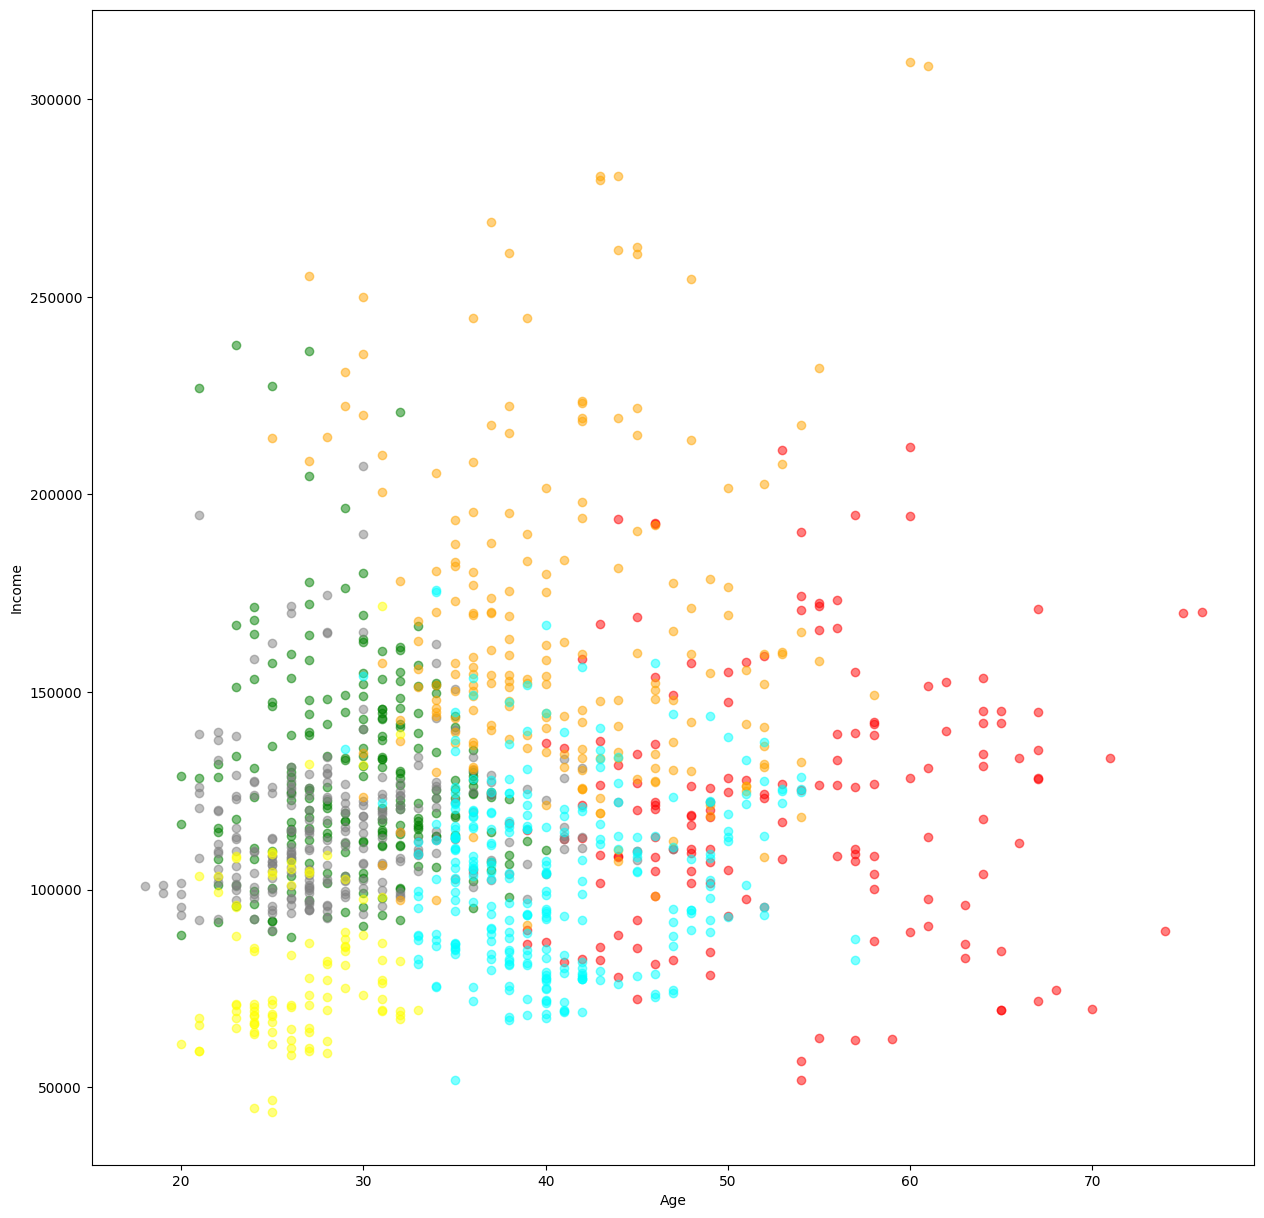

In [ ]:
colors = ['green','red','grey','orange','yellow','cyan','magneta','brown','purple','blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i,col in zip(range(10),colors):
  dftemp = data[data.Cluster==i]
  plt.scatter(dftemp.Age,dftemp['Income'], color=col, alpha=0.5)

plt.legend()
plt.show()

**Conclusion**

In this project, I have used the KModes algorithm which is developed by the MIT. I have used that algorithm because is a complex dataset which consists of both numerical and categorical data. Since K-means only used for numerical data, KPrototype is used as it can be used on both categorical and numerical data.